#### Analysing Dataset

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading dataset
df = pd.read_csv('reviews_of_threads_app.csv')
df.head()

,Unnamed: 0,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,0,Google Play,7cd90e5b-4829-43b9-9fb4-c8c6d1e339c1,Eddie Clark Jr.,NaN,Good,5,0.0,2023-08-07 19:14:36,NaN,NaN,294.0.0.27.110,en,us
1,1,Google Play,6deb8265-2bac-4524-bcb6-f90829fa4e69,Rasa RT,NaN,Weak copy of Twitter,1,0.0,2023-08-07 19:07:04,NaN,NaN,NaN,en,us
2,2,Google Play,91ef61ce-0f05-4f3b-b3d3-5d19cd408ab8,SITI NUR HAFIZA BINTI AZIZ,NaN,i wish threads have a save button for images a...,3,0.0,2023-08-07 18:57:07,NaN,NaN,294.0.0.27.110,en,us
3,3,Google Play,b7721b78-6b77-4f8c-a1d3-a854af4c1f0f,Asap Khalifah,NaN,Love it,5,0.0,2023-08-07 18:37:16,NaN,NaN,NaN,en,us
4,4,Google Play,c89ef522-c94c-4171-878f-1d672dce7f11,Syed Hussein,NaN,Very god,5,0.0,2023-08-07 18:14:15,NaN,NaN,NaN,en,us


In [3]:
# dataset shape
df.shape

(36943, 14)

In [4]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36943 entries, 0 to 36942
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               36943 non-null  int64  
 1   source                   36943 non-null  object 
 2   review_id                36943 non-null  object 
 3   user_name                36943 non-null  object 
 4   review_title             2000 non-null   object 
 5   review_description       36943 non-null  object 
 6   rating                   36943 non-null  int64  
 7   thumbs_up                34943 non-null  float64
 8   review_date              36943 non-null  object 
 9   developer_response       0 non-null      float64
 10  developer_response_date  0 non-null      float64
 11  appVersion               24855 non-null  object 
 12  laguage_code             36943 non-null  object 
 13  country_code             36943 non-null  object 
dtypes: float64(3), int64(2

In [5]:
# ratings counts
df['rating'].value_counts()

5    17000
1    11282
4     3588
3     2956
2     2117
Name: rating, dtype: int64

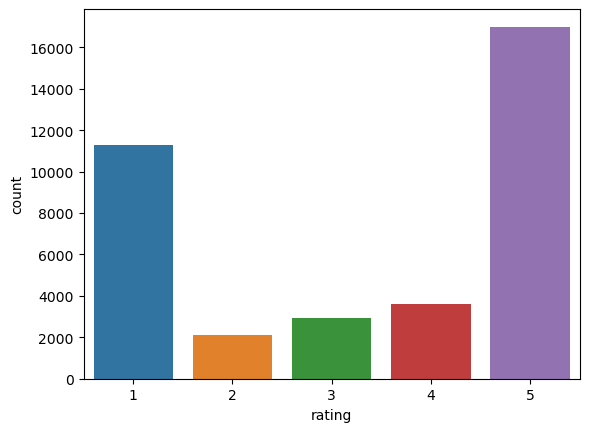

In [6]:
sns.countplot(x= 'rating', data= df)
plt.show()

In [7]:
# app versions
df['appVersion'].unique()

array(['294.0.0.27.110', nan, '293.0.0.30.110', '292.0.0.31.110',
       '289.0.0.77.109', '291.0.0.31.111', '289.0.0.68.109',
       '291.0.0.15.111'], dtype=object)

In [8]:
# country 
df['country_code'].value_counts()

us    36943
Name: country_code, dtype: int64

In [9]:
# app reviews
df['review_description']

0                                                     Good
1                                     Weak copy of Twitter
2        i wish threads have a save button for images a...
3                                                  Love it
4                                                 Very god
                               ...                        
36938    Threads have mediocre UX with 0 unique value p...
36939                        Twitter (Instagram’s Version)
36940                                                  😂😂😂
36941    How do you expect a social media app to succee...
36942                      Desperately needs new features.
Name: review_description, Length: 36943, dtype: object

#### Text Preprocessing

In [10]:
# reviews into separate dataset
reviews = pd.DataFrame(df['review_description'])

In [11]:
# stripping
reviews['review_description'] = reviews['review_description'].str.strip()

In [12]:
# converting to lowercase
reviews['review_description'] = reviews['review_description'].str.lower()

In [13]:
# removing punctutaions
reviews['review_description'] = reviews['review_description'].str.replace('[^\w\s]','')

In [14]:
reviews

,review_description
0,good
1,weak copy of twitter
2,i wish threads have a save button for images a...
3,love it
4,very god
...,...
36938,threads have mediocre ux with 0 unique value p...
36939,twitter instagrams version
36940,
36941,how do you expect a social media app to succee...


In [15]:
# tokenization
reviews['review_description'] = reviews.apply(lambda row:
                                                nltk.word_tokenize(row['review_description']), axis= 1)
reviews

,review_description
0,[good]
1,"[weak, copy, of, twitter]"
2,"[i, wish, threads, have, a, save, button, for,..."
3,"[love, it]"
4,"[very, god]"
...,...
36938,"[threads, have, mediocre, ux, with, 0, unique,..."
36939,"[twitter, instagrams, version]"
36940,[]
36941,"[how, do, you, expect, a, social, media, app, ..."


In [16]:
# Removing stopwords
reviews['review_description'] = reviews['review_description'].apply(lambda row: 
                                                ' '.join(word for word in row if word not in stopwords.words('english')))
reviews

,review_description
0,good
1,weak copy twitter
2,wish threads save button images videos would l...
3,love
4,god
...,...
36938,threads mediocre ux 0 unique value proposition...
36939,twitter instagrams version
36940,
36941,expect social media app succeed search bar sea...


#### Sentiment Analysis

In [17]:
# polarity finding function
def polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

In [18]:
# sentiment tag function
def tag(num):
    if num<0:
        return 'Negative'
    
    elif num>0:
        return 'Positive'
    
    else:
        return 'Neutral'

In [19]:
reviews['polarity'] = reviews['review_description'].apply(polarity) # finding polarity of every reviews

In [20]:
reviews['tag'] = reviews['polarity'].apply(tag) # assigning sentiment tags

In [21]:
reviews

,review_description,polarity,tag
0,good,0.700000,Positive
1,weak copy twitter,-0.375000,Negative
2,wish threads save button images videos would l...,0.000000,Neutral
3,love,0.500000,Positive
4,god,0.000000,Neutral
...,...,...,...
36938,threads mediocre ux 0 unique value proposition...,0.158333,Positive
36939,twitter instagrams version,0.000000,Neutral
36940,,0.000000,Neutral
36941,expect social media app succeed search bar sea...,0.033333,Positive


In [22]:
# sentiment tag counts
reviews['tag'].value_counts() 

Positive    19375
Neutral     12794
Negative     4774
Name: tag, dtype: int64

In [23]:
# sentiment tag percentage
(reviews['tag'].value_counts()/reviews['tag'].size)*100

Positive    52.445660
Neutral     34.631730
Negative    12.922611
Name: tag, dtype: float64

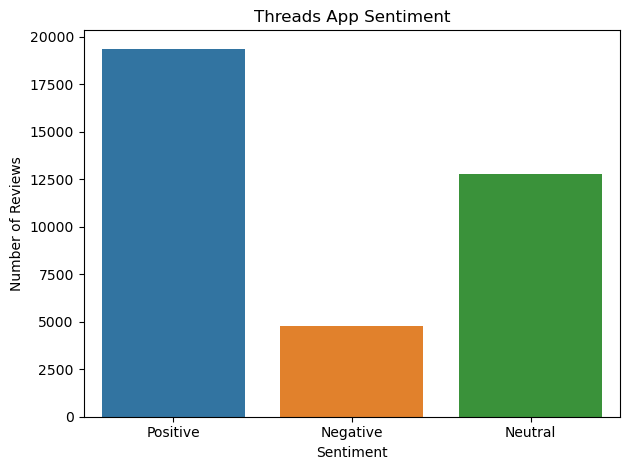

In [24]:
sns.countplot(x= 'tag', data= reviews)
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Threads App Sentiment')
plt.tight_layout()
plt.show()

#### Prediction Model Building

In [25]:
X = reviews.iloc[:,1].values # independent variable
y = reviews.iloc[:,-1] # target variable

In [26]:
X = X.reshape(-1,1)

In [27]:
# train set and test set split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state= 0)

In [28]:
# building model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [29]:
# training with train set
rf.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
# predicting 
y_predict = rf.predict(X_test)

In [31]:
# evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predict)) # classification report

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       975
     Neutral       1.00      1.00      1.00      2529
    Positive       1.00      1.00      1.00      3885

    accuracy                           1.00      7389
   macro avg       1.00      1.00      1.00      7389
weighted avg       1.00      1.00      1.00      7389



In [32]:
confusion_matrix(y_test, y_predict) # confusion matrix

array([[ 973,    2,    0],
       [   0, 2529,    0],
       [   0,    3, 3882]], dtype=int64)

#### New Review Sentiment Prediction

In [44]:
# prediction function
def predict_tag(review_input):
    polar = polarity(review_input)
    polar = np.array(polar).reshape(-1,1)
    tag = rf.predict(polar)
    
    return tag

In [47]:
# getting input 
review_input = str(input())

not good as twitter


In [48]:
# predicting the sentiment of given review
prediction = predict_tag(review_input)
print(f'{review_input} : {prediction}')

not good as twitter : ['Negative']
